# ... and *They* Didn't Have The Money?
## Some time ago, a reader tweeted a response to a story I had written involving Doylestown Borough and $1.5 million state grant.
## The comment: "Probably one of the richest towns in the state and they need a grant?"
## Of course Doylestown Borough isn't "one of the richest towns" in Pennsylvania, that's just hyperbole. In terms of revenue, Philadlephia, Pittsburgh and many other towns have a lot more money than Doylestown. 
##  That said, that comment did rase several interesting questions that I wanted to investigate a little further.
## Do towns in wealthier areas get more outside funding, or less? How much does state and federal funding effect a town's overall revenue? What impacts do state and federal funding have on the taxpayers in rural versus urban areas?
## All municipalities have a fiduciary responsibility to lessen the cost burden of its tax payers. A municipality's *need* of state or federal money is also something I don't believe anyone can make a blanket comparison of. If a grant is available for sidewalk repair, a town with a wealthy tax base and miles of sidewalks is going to *need* that money more than a poorer one with no sidewalks.
## The Pennsylvania [Department of Community and Economic Development](http://munstats.pa.gov/public/) has maintains a yearly spreadsheet of municipal funding on its Municipal Statistics website.
## I'll be using data collected from that site to review revenues, expenses and outside funding for this overview analysis.  This data isn't perfect, but I'll get into that more as I go on.

# First things first, let's load in the libraries and data sets we'll need.

In [215]:
# First the libraries I'll need (the magic line command for matplotlib inline is for displaying maps in the notbeook)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', '{:.3f}'.format)
# The first data set is a shapefile with the DCED data I collected then cleaned for this analysis.
# First we read in the shapefile ...
town_finances=pd.read_csv("town_finances.csv")
#town_finances.rename(columns={'town_count':'Town_County','Municipali':"Town",'Municipa_1':"Town_Type",'County_Nam':"County",'Reporting_':"Year",'Total_Reve':"Total_Rev",'Total_Expe':"Total_Expenses",'Expenditur':'Per_C_Ex','Intergov_1':'State_Money','Intergover':"Fed_Money",'Intergov_2':'MtoM','Total_Taxe':"All_Tax_Rev",'Taxes_Per_':'Per_C_Tax','Revenues_P':"Per_C_Rev"},inplace=True)
town_finances["Population"]=town_finances.Population.replace(np.nan,0).astype(int)
# ... then we separate the map itself for later. This is overcomplicated, but it made things 
# easier as I was drafting this.
map1=gpd.read_file("map1.rar/map1.shp")
map1.rename(columns={"Town_Count":"Town_County"},inplace=True)
#map1['Town_County']=map1.Town_County.drop_duplicates(keep='last')
#map1=map1[map1.Town_County.notnull()]
# Now we drop the map from the original to create a standard pandas dataframe...
#town_finances=town_finances.drop(columns={'geometry'})
#town_finances=pd.DataFrame(town_finances)
# ... and we read in another dataframe containing averages of certain columns.
pa_fed_and_state=pd.read_csv('PA_fed_and_state.csv')
pa_fed_and_state.rename(columns={'Municipali':'Town','County_Nam':"County",'town_count':'Town_County','Total_Reve':"Total_Rev"},inplace=True)
bucks_fed_and_state=pa_fed_and_state[pa_fed_and_state.County=='bucks']

# A quick look at the data.

In [216]:
town_finances.head(5)

Town_County           Town Town_Type County  Year    Total_Rev  \
0  kutztown boro berks  kutztown boro   Borough  berks  2010 16618307.000   
1  kutztown boro berks  kutztown boro   Borough  berks  2011 18385724.000   
2  kutztown boro berks  kutztown boro   Borough  berks  2012 18079372.000   
3  kutztown boro berks  kutztown boro   Borough  berks  2013 17485994.000   
4  kutztown boro berks  kutztown boro   Borough  berks  2014 19360670.000   

   Total_Expenses  All_Tax_Rev  Real_Estat  Fed_Money  State_Money      MtoM  \
0    18075898.000  1064972.000  534877.000   1171.000   423464.000     0.000   
1    19483717.000  1078487.000  535540.000      0.000   595473.000 50000.000   
2    18240591.000  1153270.000  592103.000      0.000   370190.000     0.000   
3    17633384.000  1144721.000  586106.000      0.000   471993.000     0.000   
4    19745748.000  1230472.000  640276.000      0.000   482134.000     0.000   

   Population  Per_C_Tax  Per_C_Rev  Per_C_Ex  
0        5012    212.480   3315.700  3606.520  
1        5012    215.180   3668.340  3887.410  
2        5012    230.100   3607.220  3639.380  
3        5012    228.400   3488.830  3518.230  
4        5012    245.510   3862.860  3939.690

## It's nothing overly complicated here. The first column is my identifying label to merge with the map later on. Apart from some location information, we have the reporting year of the data, total revenue, total expenses, all tax revenue, real eastate taxes, federal money, state money and "MtoM" is funding from a municipality. Population are 2010 census estimates the DCED included each year and the columns starting with "Per_C" means "Per Capita" -- so taxes, revenues and expenses per person.

## So now we're ready to get started. Let's take a look and see what 10 municipalities had the most money in 2017.

In [217]:
town_finances[town_finances.Year=="2017"].sort_values(by='Total_Rev',ascending=False).head(10)

Town_County               Town  \
17871  philadelphia city philadelphia  philadelphia city   
2797        pittsburgh city allegheny    pittsburgh city   
18939           allentown city lehigh     allentown city   
8411       bethlehem city northampton     bethlehem city   
489                reading city berks       reading city   
19446        lancaster city lancaster     lancaster city   
13853                  erie city erie          erie city   
1890         scranton city lackawanna      scranton city   
17118         harrisburg city dauphin    harrisburg city   
14989     lower merion twp montgomery   lower merion twp   

                  Town_Type        County  Year      Total_Rev  \
17871                  City  philadelphia  2017 8957018622.000   
2797                   City     allegheny  2017  780856228.000   
18939                  City        lehigh  2017  190538602.000   
8411                   City   northampton  2017  186234309.000   
489                    City         berks  2017  180133323.000   
19446                  City     lancaster  2017  153432034.000   
13853                  City          erie  2017  141216568.000   
1890                   City    lackawanna  2017  123546658.000   
17118                  City       dauphin  2017  109583900.000   
14989  First Class Township    montgomery  2017   96471277.000   

       Total_Expenses    All_Tax_Rev    Real_Estat     Fed_Money  \
17871  8859954000.000 3761289000.000 587099128.000 726943073.000   
2797    729104568.000  447118406.000 143895363.000  27888837.000   
18939   199375912.000   71446750.000  30446805.000   6391890.000   
8411    173458007.000   40779695.000  25980099.000   1784833.000   
489     158716331.000   57906253.000  24938094.000         0.000   
19446   157235692.000   36534897.000  27592785.000   2202754.000   
13853   140204092.000   51776841.000  35502624.000   4245332.000   
1890    105980353.000   72414032.000  34039325.000         0.000   
17118   102233552.000   44093231.000  17564616.000   4045620.000   
14989    93857454.000   48231672.000  31519812.000    961053.000   

         State_Money         MtoM  Population  Per_C_Tax  Per_C_Rev  Per_C_Ex  
17871 1644411067.000 61195600.000     1526006   2464.790   5869.580  5805.980  
2797    55326944.000  2605587.000      305704   1462.590   2554.290  2385.000  
18939   16876959.000  2044409.000      118032    605.320   1614.300  1689.170  
8411    23560981.000        0.000       74982    543.860   2483.720  2313.330  
489     12890245.000    28373.000       88082    657.410   2045.060  1801.920  
19446    6945602.000   820953.000       59322    615.870   2586.430  2650.550  
13853    8493661.000 11879264.000      101786    508.680   1387.390  1377.440  
1890     7466968.000   271559.000       76089    951.700   1623.710  1392.850  
17118   10052872.000  1979580.000       49528    890.270   2212.560  2064.160  
14989    5654409.000   125765.000       57825    834.100   1668.330  1623.130

## It's pretty clear from this that the wealthiest municipalities in Pennsylvania are its cities. Lower Merion Township, Montgomery County, is the only exception in this top-10 list.
## Do these cities make up the wealthiest counties as well?

In [218]:
town_finances[town_finances.Year=='2017'].groupby("County").Total_Rev.sum().sort_values(ascending=False).head(10)

County
philadelphia   8957018622.000
allegheny      1729637970.000
montgomery     1068205368.000
bucks           643533881.000
chester         521159170.000
delaware        520510466.000
berks           500891424.000
lancaster       496325369.000
northampton     450491953.000
york            383766763.000
Name: Total_Rev, dtype: float64

## Short answer: No.
## Philadelphia and Allegheny County maintained the same top to spots as the municipal list, but Montgomery County shot up from 10th to 3rd place. Bucks County fell just below Montgomery while not even appearing in the previous list.
## Now, I've just arbitrarily sorted the list by the top 10 for easier reading. So where does Doylestown Borough fall in terms of total revenue? First, let's see what the median revenue was in 2017, according to the DCED.

In [219]:
print(town_finances[town_finances.Year=='2017'].Total_Rev.median())

907977.0


In [220]:
town_finances[town_finances.Total_Rev==907977]

Town_County             Town              Town_Type  \
10955  west finley twp washington  west finley twp  Second Class Township   

           County  Year  Total_Rev  Total_Expenses  All_Tax_Rev  Real_Estat  \
10955  washington  2017 907977.000      469833.000   274863.000   16410.000   

       Fed_Money  State_Money  MtoM  Population  Per_C_Tax  Per_C_Rev  \
10955      0.000   545031.000 0.000         878    313.060   1034.140   

       Per_C_Ex  
10955   535.120

## West Finley Township in Washington County is our median value with just over $900,000 in 2017.
## So, what does the DCED data show Doylestown had?

In [221]:
town_finances[(town_finances.Year=='2017')&(town_finances.Town_County=='doylestown boro bucks')]

Town_County             Town Town_Type County  Year  \
5566  doylestown boro bucks  doylestown boro   Borough  bucks  2017   

       Total_Rev  Total_Expenses  All_Tax_Rev  Real_Estat  Fed_Money  \
5566 8680613.000     9486954.000  4077057.000 1435143.000      0.000   

      State_Money  MtoM  Population  Per_C_Tax  Per_C_Rev  Per_C_Ex  
5566   512919.000 0.000        8380    486.520   1035.870  1132.090

## Doylestown Borough had roughly 9.5 times the revenue and about 10 times the population as the median value in 2017. 
## Now, this doesn't really give us any substantive information. It's one year of aggregate municipal data collected by the state.
## Maybe West Finley had an exceptionally bad year for collecting taxes in 2017, or maybe Doylestown Borough had a surge of money. 
## It's not uncommon for tax revenues in a town to shoot up after a better-than-average year for property sales.
## Following the advice of a municipal manager on an entirely unrelated project and focusing on an entirely different column not included here, let's stick to the average amounts between 2010 and 2017 from here on out. 
## I've already created that table in our "pa_fed_and_state" variable

In [222]:
pa_fed_and_state.head()

Town      County              Town_County   Fed_Money  \
0        abbott twp      potter        abbott twp potter       0.000   
1  abbottstown boro       adams   abbottstown boro adams   42853.750   
2      abington twp  montgomery  abington twp montgomery 2025048.000   
3         adams twp      butler         adams twp butler    2298.000   
4         adams twp     cambria        adams twp cambria   96652.250   

     Total_Rev  State_Money  Fed_Decimal  Fed_Percent  State_Decimal  \
0   318335.620   196725.620        0.000        0.000          0.618   
1   414809.750    33653.000        0.103       10.330          0.081   
2 68273322.880  3924311.750        0.030        2.970          0.057   
3  8155985.000   678198.380        0.000        0.030          0.083   
4  1947815.380   333407.620        0.050        4.960          0.171   

   State_Percent    FS_Combo  FS_Combo_Decimal  FS_Combo_Percent  Population  \
0         61.800  196725.620             0.618            61.800         242   
1          8.110   76506.750             0.184            18.440        1011   
2          5.750 5949359.750             0.087             8.710       55310   
3          8.320  680496.380             0.083             8.340       11652   
4         17.120  430059.870             0.221            22.080        5972   

   F_Mon_PC  S_Mon_PC  All_Tax_Rev  Taxes_PC   Real_Estat  Real_Taxes_PC  
0     0.000   812.916    55978.000   231.314    32275.625        133.370  
1    42.387    33.287   220676.250   218.275    95613.750         94.573  
2    36.613    70.951 29430362.375   532.098 13345034.250        241.277  
3     0.197    58.204  4859073.875   417.016   619699.375         53.184  
4    16.184    55.828  1057898.500   177.143   377955.250         63.288

#### I've added some columns here, some of which might more for reference than anything else. The columns ending in "decimal" or "percent" are just the same numbers presented in two formats. Columns beginning with "FS" mean federal and state funds combined. Each of these new columns are dividing their respective revenues with the Total_Rev column.

## Alright, now we have something I think will be pretty useful. Rather than just listing the numbers, let's also start visualizing this a little more holistically.
### Question 1: What towns have the most average revenues?

# "_Between Philapdelphia and Pittsburgh..._"

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


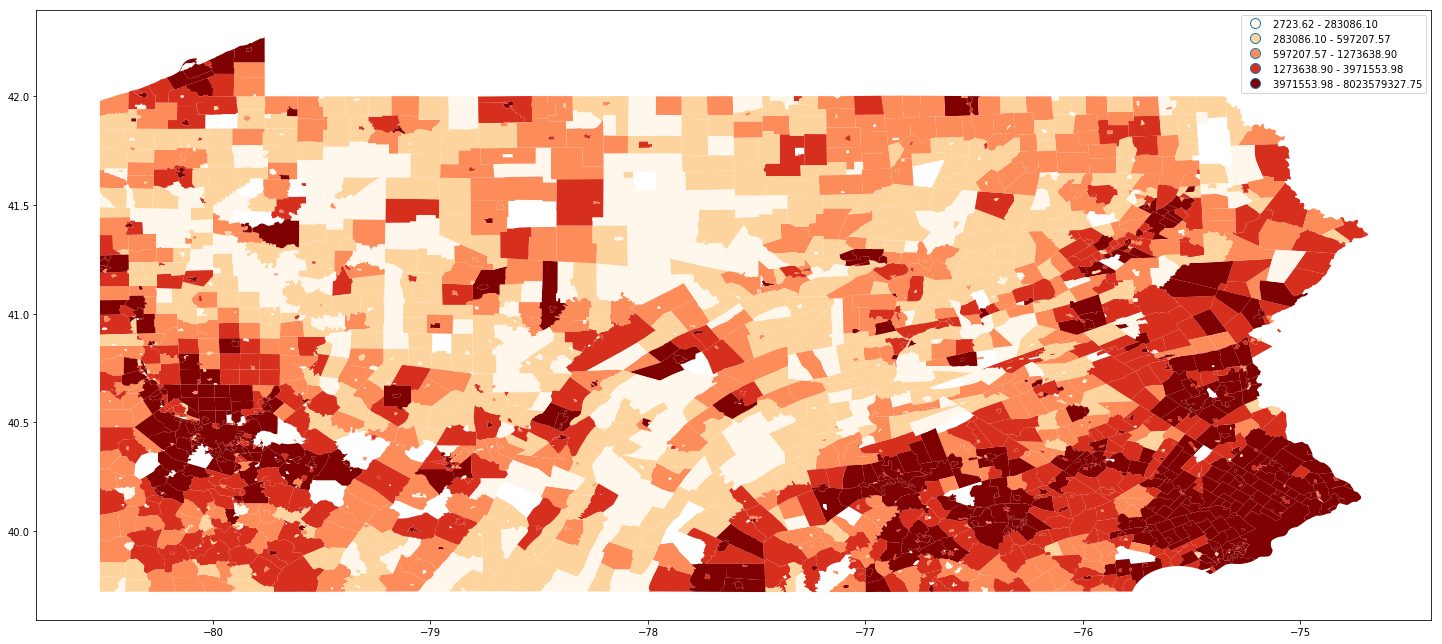

In [223]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Total_Rev',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

##### The shapefile from this map was taken from the [U.S. Census TIGER/Line shapefile website](https://www.census.gov/cgi-bin/geo/shapefiles/index.php). In some cases, some municipalities either were not included in the DCED data for some years, or a minority of towns did not have a corresponding shape in the census file. Some areas in white might not be representative of that area's average revenues or funding.

## As far as average total revenue, the Philadelphia and Pittsburgh metropolitan areas are among the towns with the most revenue. This map is broken down in to "quantiles," meaning each shade of red and orange in this map are not divided by an equal amount. Our median town from earlier would fall into the upper middle range in this map.
## Most of Bucks County is in that darkest shade of red, with some towns in upper Bucks falling into the second darkest area. 
## If you look closely at Bucks County, you can also make out Chalfont and New Britain boroughs as two of those second highest areas, with Doylestown Borough still in the highest quantile.
## Alright, I think we're ready for the next question.
### Question 2: What towns see the most total state and federal funding?

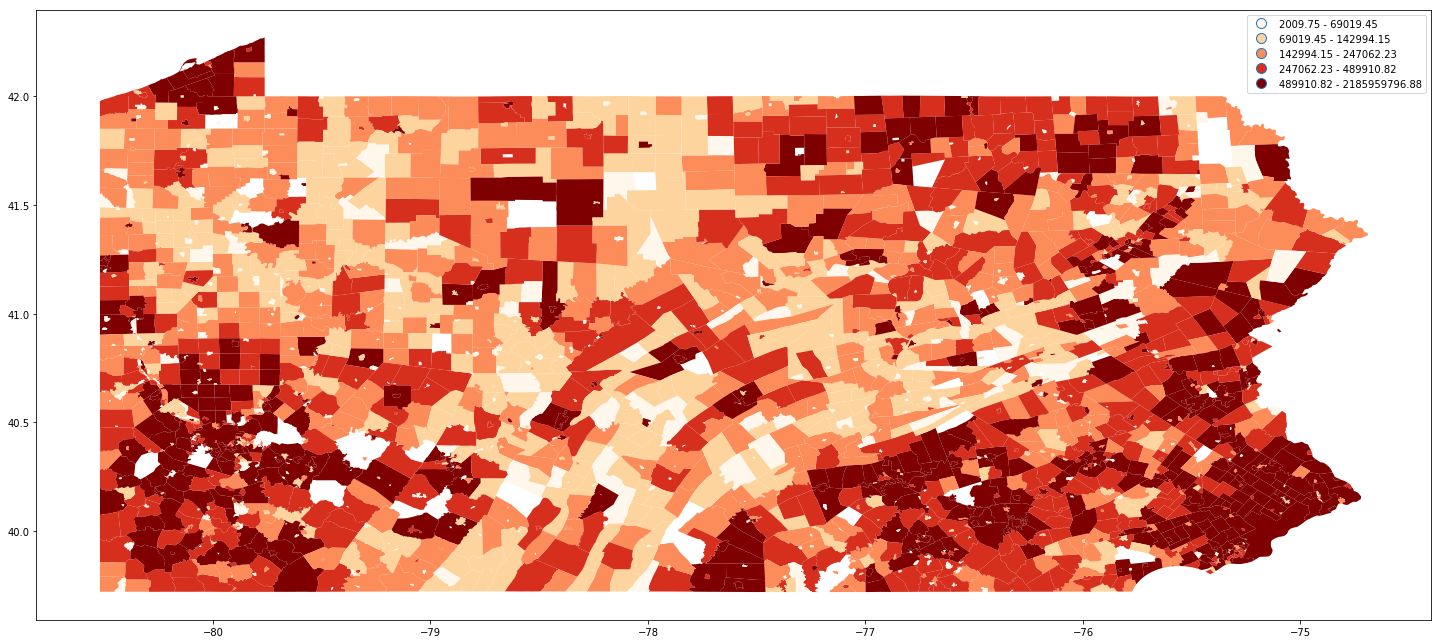

In [224]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='FS_Combo',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

## Now this is a little more interesting. This map shows a little more of an even spread across the state. There's still that concentration around metropolitan areas, but but many of our towns in the previous map's lower qountiles have move up a level.
## Before I go any further, lets take a quick look at some of the towns in the darkest shades of this map.

In [225]:
pa_fed_and_state[['Town_County','FS_Combo']].sort_values(by='FS_Combo',ascending=False).head(10)

Town_County       FS_Combo
1646  philadelphia city philadelphia 2185959796.880
1672       pittsburgh city allegheny   89919786.250
29             allentown city lehigh   31251817.120
151       bethlehem city northampton   23226893.240
1749              reading city berks   20963535.870
894          harrisburg city dauphin   17700734.500
131               bensalem twp bucks   17536035.620
2414      williamsport city lycoming   16025823.880
674                   erie city erie   13157292.500
339            chester city delaware   12191750.500

## Well, it seems one Bucks County town does receive more state and federal money than many others, but it isn't Doylestown. Bensalem has collected an average of $17,536,035 in federal and state funds between 2010 and 2017.
## While Philadelphia and Pittsburgh are again taking the top two positions, most state and federal dollars are in eastern Pennsylvania, and more specifically in the south eastern part of the state.
## Getting state and federal money is one thing, but how that money makes up a towns' overall revenue is another issue entirely.
### Question 3: In which towns does federal and state funds make up the largest percentage of total revenues?

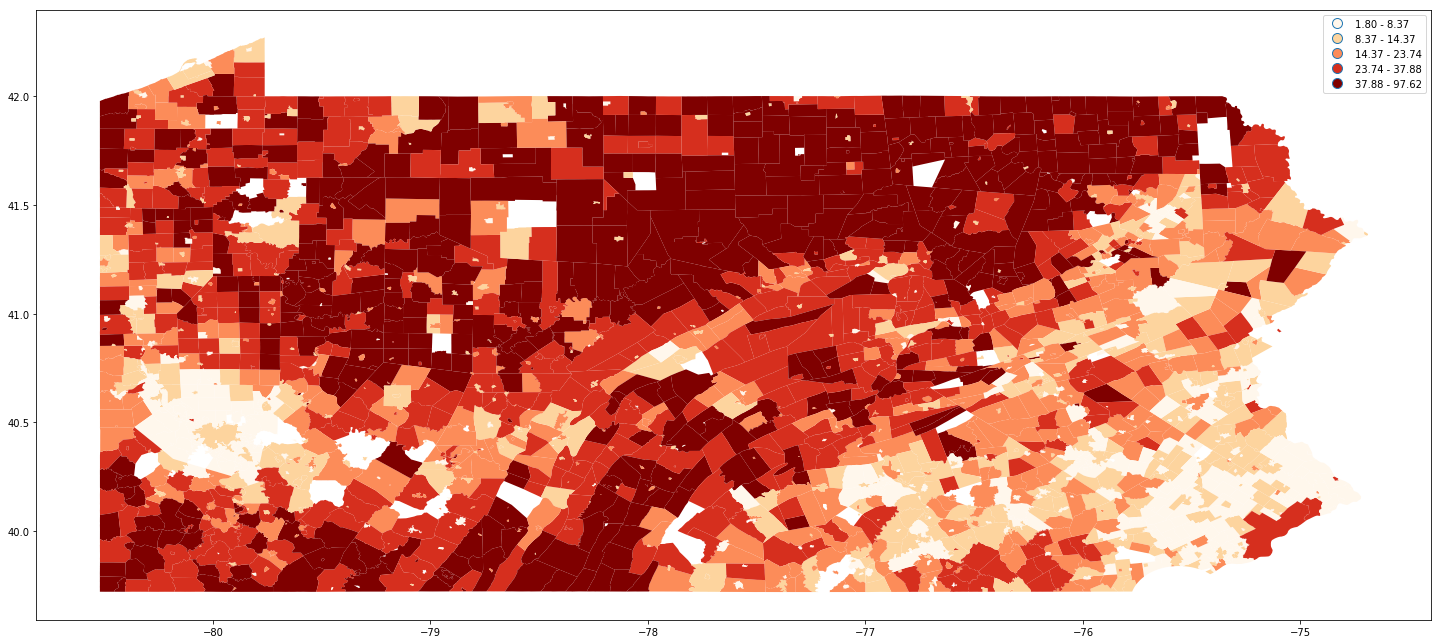

In [226]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='FS_Combo_Percent',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

## Now this is really cool, I think. We almost see an inverse of the previous maps here. 
## Our quantiles range from as low as 1.80 percent up to as high as 97.62.
## The darkest shades in this map include towns that have at least 37.88 percent of their total revenues through state and federal funding.

In [227]:
print(pa_fed_and_state[['Town_County','FS_Combo_Percent']].sort_values(by='FS_Combo_Percent',ascending=False).head(10))
print(pa_fed_and_state[['Town_County','Total_Rev']].sort_values(by='Total_Rev').head(10))

                       Town_County  FS_Combo_Percent
1826        s.n.p.j. boro lawrence            97.620
2304     wellersburg boro somerset            89.280
1367             millstone twp elk            86.830
1997          spring creek twp elk            85.570
1300          mchenry twp lycoming            84.710
1577          overton twp bradford            84.440
2030          stevens twp bradford            84.440
745               fox twp sullivan            83.190
467          cummings twp lycoming            82.940
1701  port clinton boro schuylkill            81.260
                    Town_County  Total_Rev
1826     s.n.p.j. boro lawrence   2723.620
197           brady twp clarion   8408.800
1928    smicksburg boro indiana   8901.120
2451  worthville boro jefferson  11075.380
1879  shade gap boro huntingdon  11092.500
1472    newburg boro clearfield  13357.880
1024         jeddo boro luzerne  14490.620
384    coalmont boro huntingdon  14895.620
1463     new paris boro bedfor

## Some of the 10 communities with the highest percentage of state and federal funds don't appear in the 10 communities with the lowest total revenue.
## SNPJ is an unusual place as far as municipalities go. Amy Linn wrote a story for the Washington Post about this community of about 20 people, according to 2010 census estimates. [The Town That Does Nothing But Polka](https://www.washingtonpost.com/archive/lifestyle/1988/09/29/the-town-that-does-nothing-but-polka/a37ecb4f-f29a-4f99-bcec-e40743f00ab5/?utm_term=.26ed4544d939).
## It's also really important to recognize that the DCED data does not identify federal and state money, referred to as "intergovernmental transfers," as grants or any other designation. From the data alone, we don't know why these towns received this money, how they spent it, or even if the money is a lump sum or awarded incrementally over years.

## Now, while I think all of this is really interesting, it's kind of pointless if we don't take a look at the effect on tax payers.
## First, a quick look at tax revenues per person.

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


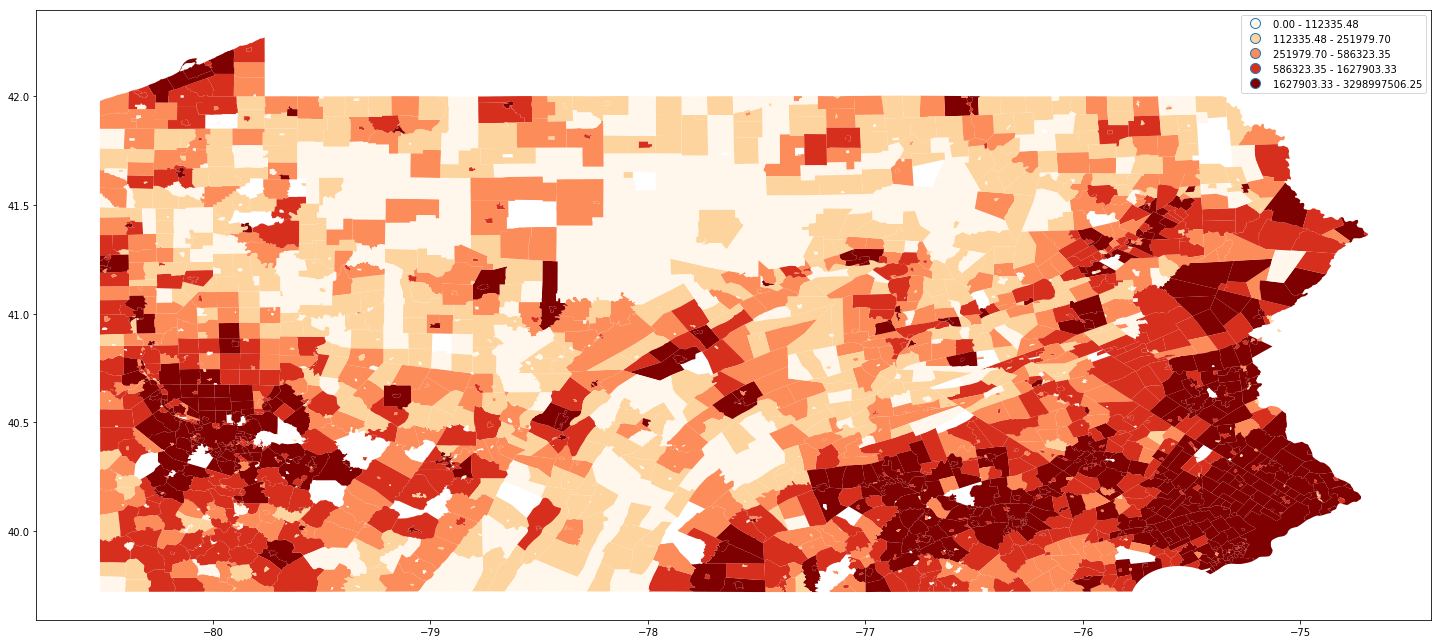

In [232]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='All_Tax_Rev',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### This map is using an "All Tax Revenue" average from our first data set. Once again, our metro areas are the darkest shades, indicating the most taxes generated on average.
### We can see a few lighter colored blips in Bucks County again, with most of those in the upper part of the county.

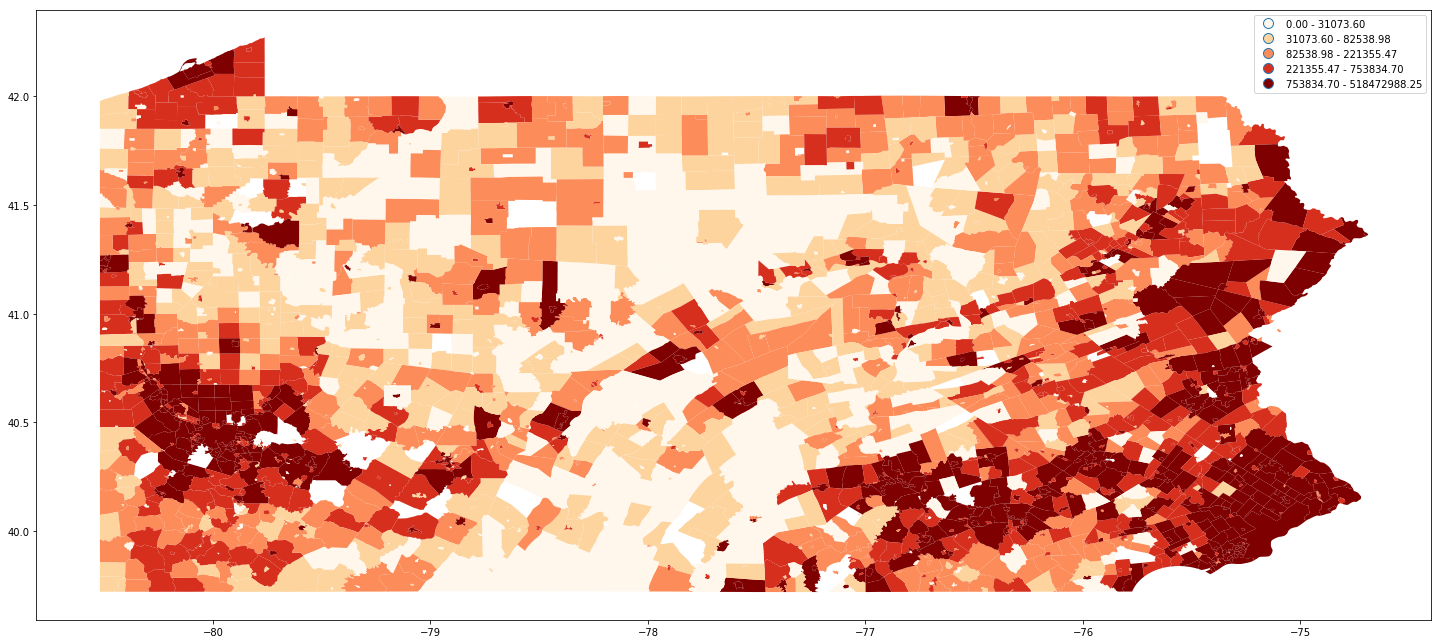

In [236]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Real_Estat',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### This map, which shows total average real estate tax is not dissimilar from the all taxes map, but this is probably a more appropriate number to focus on for now. 
### Now, let's look at what Real Estate taxes per capita looks like.

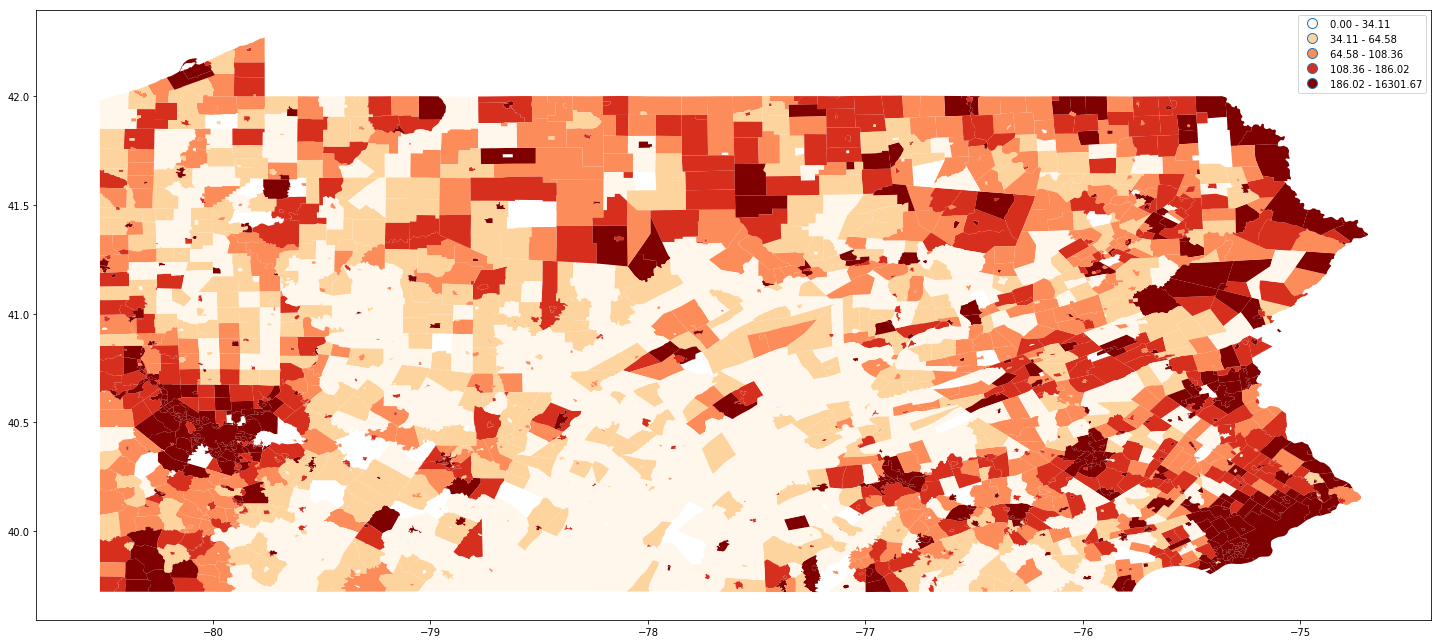

In [237]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Real_Taxes_PC',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### Couple of things to note here. First, you see those little splotches of darker colors that kind of fall within the larger, lighter-colored areas? Many of them are boroughs. Just a quick glance at those below.

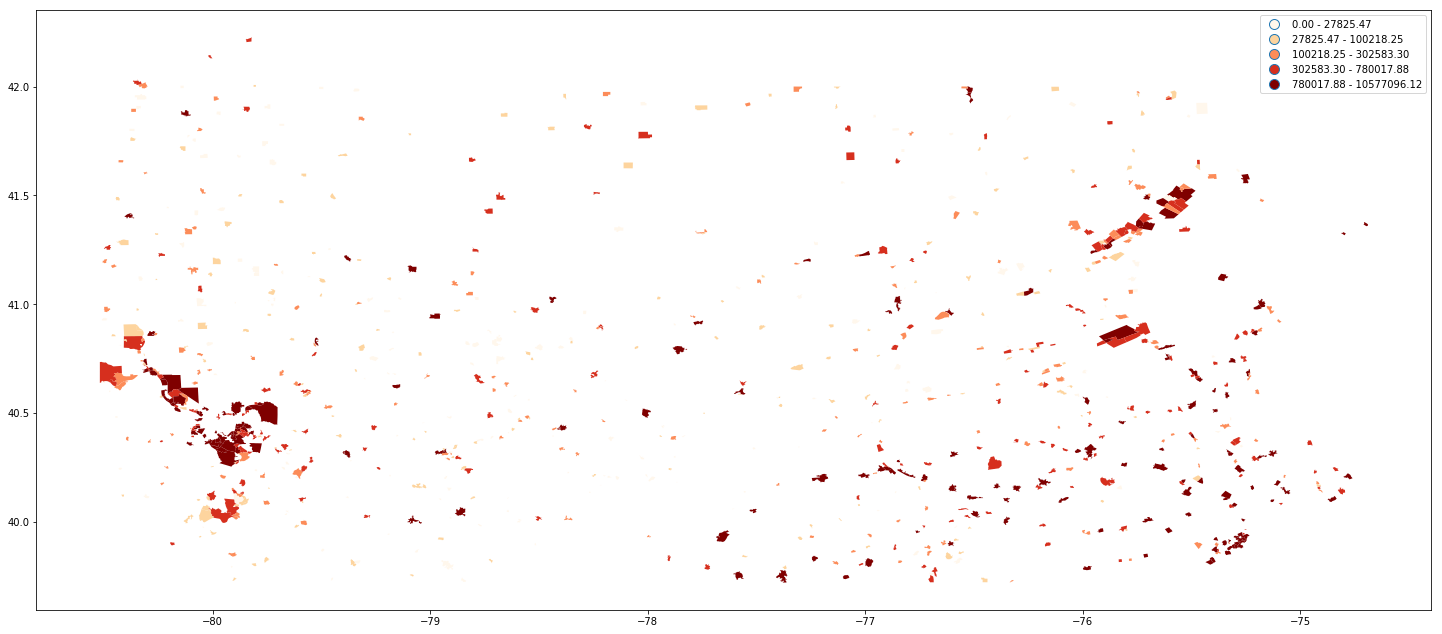

In [240]:
a1=pa_fed_and_state[pa_fed_and_state.Town_County.str.contains(" boro ")]
pd.merge(map1,a1,on='Town_County').plot(column='Real_Estat',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### I really need to talk to a financial expert on this one, but I'm reading this as borough property owners typically have a higher local tax burden than other property owners in other municipal classes.
### That's a story for another time, though. Back to the previous map.

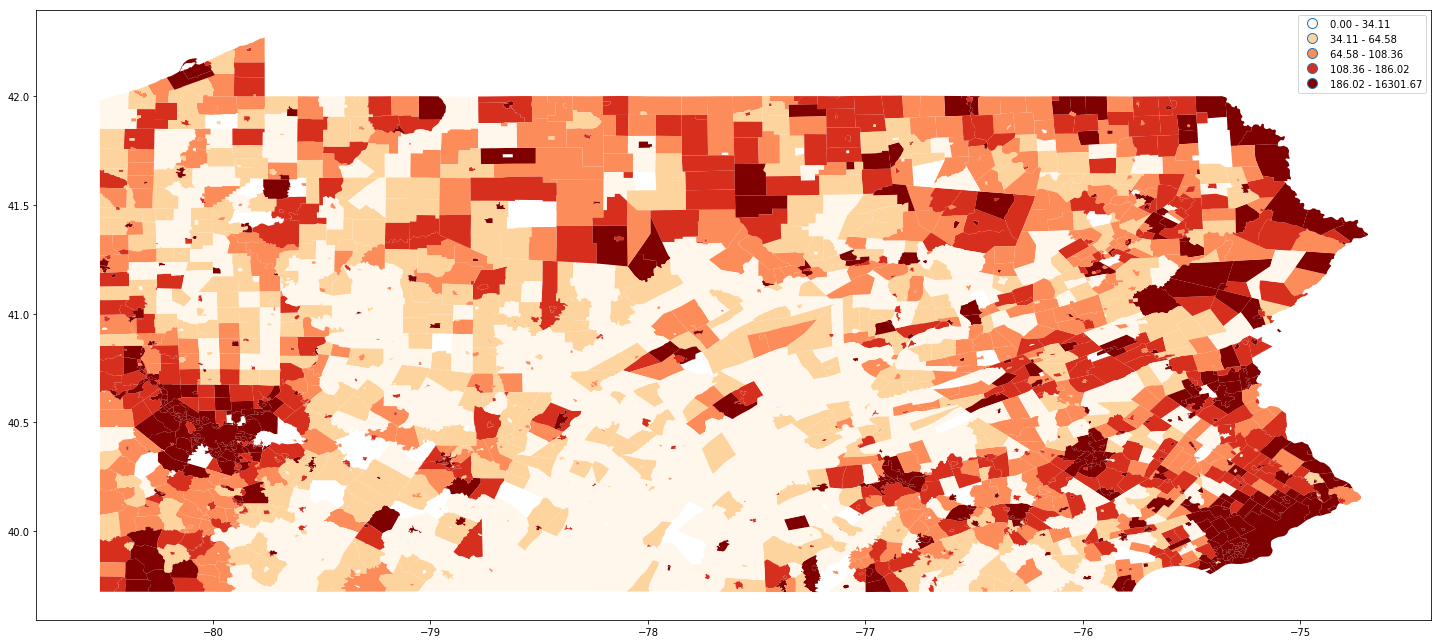

In [241]:
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Real_Taxes_PC',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### Right, so another interesting thing here is we can see that metropolitan wealth concentration starts to tighten a bit more here. Some of the highest real estate taxes per capita towns are really just littered throughout the state now.
### Remember how I said at the start of this that every town has a fiduciary responsibility to its taxpayers to seek out grants?
### This is where we get to see what happens without that money.
### This is going to be purely hypothetical, so please -- for the love of all that is good -- please keep that in mind for the next few minutes.
### Lets assume that all of that state money was never awarded, all of the towns went through with whatever they were using the money for anyway. Where did they get the money? Well, most town managers will tell you there's really only two ways to generate revenue for a local govenment -- and we just got rid of one of them.

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


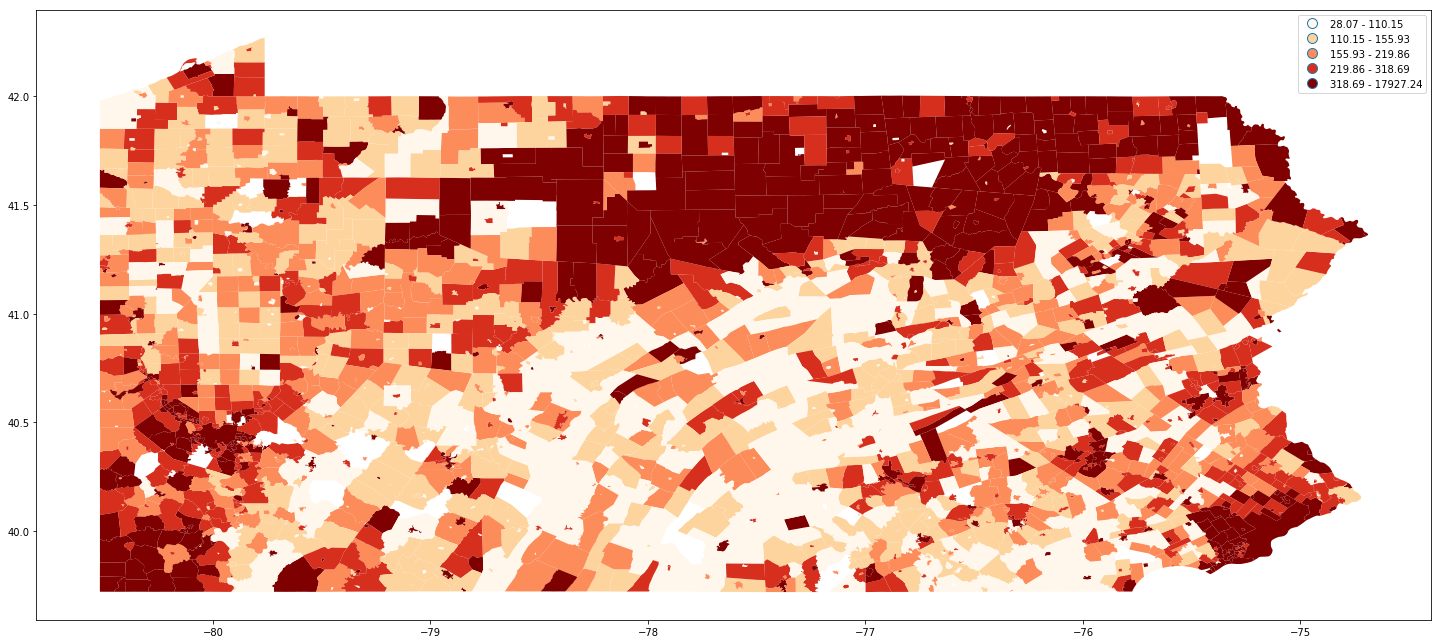

In [245]:
pa_fed_and_state['Without_SMoney']=pa_fed_and_state.S_Mon_PC+pa_fed_and_state.Real_Taxes_PC
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Without_SMoney',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### Many towns, especially in the northern and north-central areas of the state would no be paying a significant amount more in taxes.
### The money from real estate taxes per person shot up by at least nearly $300 in some areas.

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\pysal\esda\mapclassify.py:671: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\pysal\esda\mapclassify.py:702: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


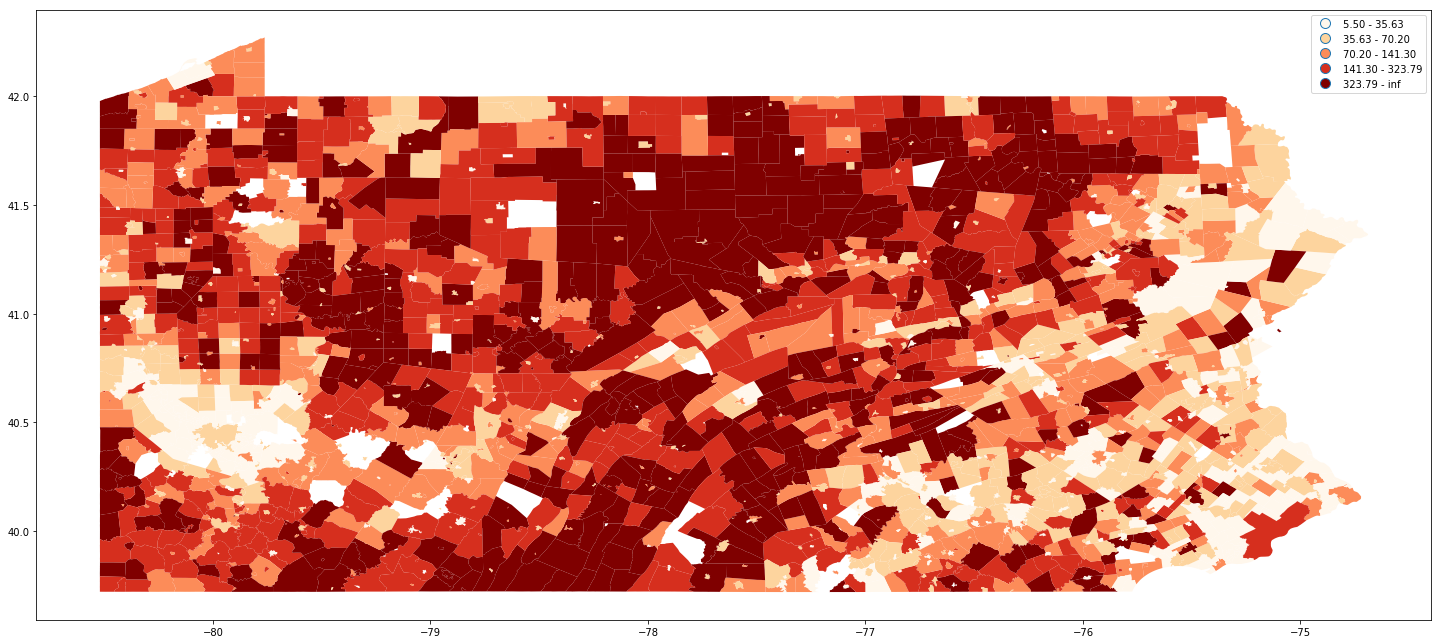

In [256]:
pa_fed_and_state['Without_Percent_Change']=((pa_fed_and_state.Without_SMoney-pa_fed_and_state.Real_Taxes_PC)/pa_fed_and_state.Real_Taxes_PC)*100
pd.merge(map1,pa_fed_and_state,on='Town_County').plot(column='Without_Percent_Change',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### The tax burden to cover the costs lost by not persuing state funds would mean the most fortunate areas might see their taxes go up by up to 70 percent. Many others would see well over a 100 percent increase, and much of those towns are the ones that didn't have a lot of relative wealth to begin with.

c:\users\c_ull\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


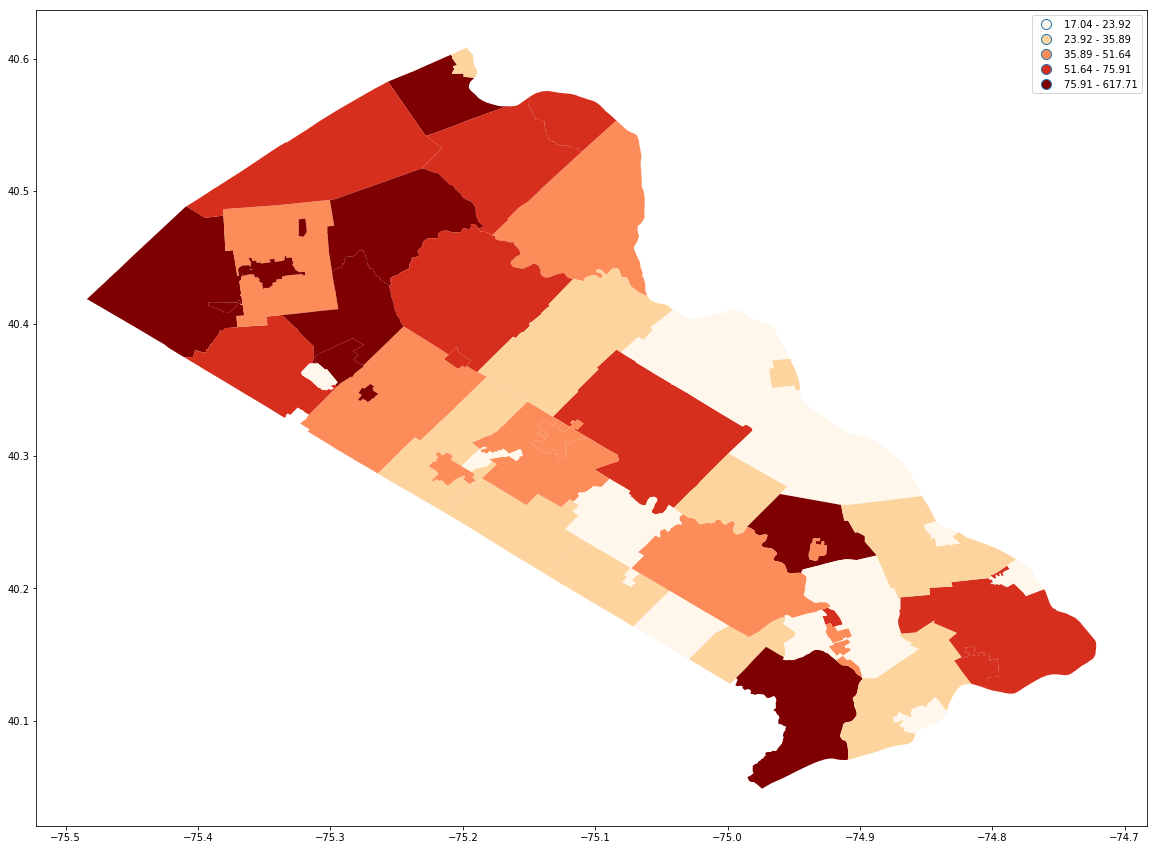

In [259]:
bucks1=pa_fed_and_state[pa_fed_and_state.County=='bucks']
pd.merge(map1,bucks1,on='Town_County').plot(column='Without_Percent_Change',scheme='quantiles',legend=True,cmap='OrRd',figsize=(25,15))

### Once again, Doylestown Borough falls into our middle ground. Property owners would basically be paying a little over 40 percent in taxes to make up for the lost average state money. 

In [268]:
bucks1[['Town','Total_Rev','Real_Estat','State_Money','Without_Percent_Change']].sort_values(by='Without_Percent_Change',ascending=False)

Town    Total_Rev   Real_Estat  State_Money  \
1733        quakertown boro 29345013.000   128039.625   790908.620   
1770      richlandtown boro   569116.620    27556.250    63743.380   
1348            milford twp  4902658.250   298754.000   497105.500   
1482            newtown twp 15948046.250   869770.000  1175540.750   
131            bensalem twp 56722156.620 12252870.125 15892754.000   
553              durham twp   440246.880    84964.250   107837.880   
2135   trumbauersville boro   610267.620    19868.375    24868.880   
1631          perkasie boro 17737882.620   484156.875   555385.750   
1918        silverdale boro   505848.250    25709.000    27824.380   
909             haycock twp   854309.380   163899.250   167102.250   
613       east rockhill twp  3950501.120   640021.750   497969.620   
702               falls twp 28799737.880  2271465.500  1659624.620   
536             dublin boro  2102262.880   221648.625   157783.120   
2372      west rockhill twp  3248421.250   459671.500   325979.500   
1103         langhorne boro   941270.120   206438.875   142257.880   
1489         nockamixon twp  1491783.380   323440.125   215345.000   
2011        springfield twp  3199175.880   558642.750   364968.880   
2136         tullytown boro  5328402.250   303942.000   169985.000   
238          buckingham twp 20627656.250  2012650.625  1072550.500   
114          bedminster twp  4356712.880   780229.125   410766.750   
211           bridgeton twp   378755.750   104848.875    55103.380   
1104   langhorne manor boro   860691.750    86899.125    44680.000   
2105            tinicum twp  3468551.120   663892.500   336330.250   
945            hilltown twp  8546990.380  1815217.750   860637.380   
1766           richland twp  7921322.120  1617076.000   703250.380   
316           chalfont boro  3080213.880   726480.750   305070.120   
530         doylestown boro  8535358.750  1320051.625   545563.620   
531          doylestown twp 13650749.500  2701389.125  1096680.120   
1532        northampton twp 32737279.120  6952846.125  2589347.380   
1626           penndel boro  2091048.750   360444.875   132020.500   
1481           newtown boro  2180342.380   423223.000   152942.250   
977         hulmeville boro   527159.000   107877.750    38736.880   
2245         warminster twp 24350949.000  5638390.375  2020363.750   
1441        new britain twp  6849519.250  1981779.250   663033.750   
2453        wrightstown twp  2831485.120   469850.250   155933.380   
1779      riegelsville boro   559024.120   106625.000    34829.120   
2249         warrington twp 27278313.250  4098859.250  1311694.620   
1455          new hope boro  4855322.120   697445.375   215627.880   
1222  lower southampton twp 22684568.750  4018125.000  1227025.750   
1210    lower makefield twp 32355430.880  7922998.750  2118128.750   
1686          plumstead twp 14324743.750  2717286.375   723641.380   
218             bristol twp 51187275.380 13222073.000  3212241.880   
2254            warwick twp 11579311.750  3387039.375   801667.250   
1334         middletown twp 37426034.620  9248167.500  2167360.500   
1869      sellersville boro  4624976.000   675815.750   157270.250   
2195    upper makefield twp 11856598.620  2722961.750   613811.380   
2460           yardley boro  2293694.380   528420.625   114446.620   
1941           solebury twp 17128987.880  4840270.375  1025298.120   
2208  upper southampton twp 12573227.880  4675048.875   922928.880   
217            bristol boro 13299104.120  4060543.000   751840.500   
1440       new britain boro  1743740.880   808131.500   145333.620   
1000           ivyland boro   819754.120   191073.125    34006.750   
1406       morrisville boro  5792779.750  2742982.500   467532.750   

      Without_Percent_Change  
1733                 617.706  
1770                 231.321  
1348                 166.393  
1482                 135.155  
131                  129.706  
553                  126.921  
2135                 125.

In [270]:
bucks1[bucks1.Town.str.contains("qu")]

Town County            Town_County  Fed_Money    Total_Rev  \
1733  quakertown boro  bucks  quakertown boro bucks  88280.250 29345013.000   

      State_Money  Fed_Decimal  Fed_Percent  State_Decimal  State_Percent  \
1733   790908.620        0.003        0.300          0.027          2.700   

               ...            FS_Combo_Percent  Population  F_Mon_PC  \
1733           ...                       3.000        8979     9.832   

      S_Mon_PC  All_Tax_Rev  Taxes_PC  Real_Estat  Real_Taxes_PC  \
1733    88.084  1404295.125   156.398  128039.625         14.260   

      Without_SMoney  Without_Percent_Change  
1733         102.344                 617.706  

[1 rows x 22 columns]